# Proposta

A distribuidora de vinhos **JackWine** decidiu expandir seus horizontes e agora est√° importando vinhos tintos e branco portugueses, mais especificamente a marca "Vinho Verde", que far√° sua carta de vinhos se tornar mais vasta aqui no Brasil.

* link do dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

#### Objetivos principais das an√°lises:

1. Distribui√ß√£o das co-vari√°veis por qualidade do vinho?

2. Rela√ß√£o entre as co-vari√°veis e teor alc√≥olico?

3. Qual a acidez vol√°til m√©dia dos vinhos de qualidade elevada?

4. Qual a rela√ß√£o entre teor alc√≥olico e qualidade do vinho?

5. H√° alguma rela√ß√£o entre acidez vol√°til e teor alc√≥olico?
    
6. H√° alguma rela√ß√£o entre acidez vol√°til e qualidade do vinho?

In [1]:
import sys # Fornece acesso a vari√°veis e fun√ß√µes do sistema Python
import os # fornece interface com o sitema operacional
import pandas as pd

# Caminho absoluto para a pasta do projeto (n√≠vel acima de 'src')
project_root = os.path.abspath("..")

if project_root not in sys.path:
    sys.path.append(project_root)

# Importa Classes de objetos
from src.etl.extract import extract_csv_processed
from src.etl.transform import remove_outliers
from src.etl.stats import calcula_skew_kurtosis, obter_dados_nulos, detecta_outliers_iqr, matrix_correlacao, analisar_distribuicao
from src.visualization.graficos import grafo_barra, grafo_heatmap, grafo_scatterplot, grafo_boxplot, grafo_distribuicao, grafo_bloco_boxplot, grafo_dist_boxplot

In [2]:
# Extrai dados processados
input_path = 'arquivos_exploratorio.csv'

df = extract_csv_processed(input_path)
df

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0             7.4           0.700           0.00              1.9     0.076   
1             7.8           0.880           0.00              2.6     0.098   
2             7.8           0.760           0.04              2.3     0.092   
3            11.2           0.280           0.56              1.9     0.075   
4             7.4           0.700           0.00              1.9     0.076   
...           ...             ...            ...              ...       ...   
1594          6.2           0.600           0.08              2.0     0.090   
1595          5.9           0.550           0.10              2.2     0.062   
1596          6.3           0.510           0.13              2.3     0.076   
1597          5.9           0.645           0.12              2.0     0.075   
1598          6.0           0.310           0.47              3.6     0.067   

      dioxido_enxofre_livre  dioxido_enxofre_total  densidade    ph  sulfatos  \
0                      11.0                   34.0    0.99780  3.51      0.56   
1                      25.0                   67.0    0.99680  3.20      0.68   
2                      15.0                   54.0    0.99700  3.26      0.65   
3                      17.0                   60.0    0.99800  3.16      0.58   
4                      11.0                   34.0    0.99780  3.51      0.56   
...                     ...                    ...        ...   ...       ...   
1594                   32.0                   44.0    0.99490  3.45      0.58   
1595                   39.0                   51.0    0.99512  3.52      0.76   
1596                   29.0                   40.0    0.99574  3.42      0.75   
1597                   32.0                   44.0    0.99547  3.57      0.71   
1598                   18.0                   42.0    0.99549  3.39      0.66   

      alcool  qualidade  
0        9.4          5  
1        9.8          5  
2        9.8          5  
3        9.8          6  
4        9.4          5  
...      ...        ...  
1594    10.5          5  
1595    11.2          6  
1596    11.0          6  
1597    10.2          5  
1598    11.0          6  

[1599 rows x 12 columns]

# An√°lise Explorat√≥ria (EDA)

In [3]:
# Shape
df.shape

(1599, 12)

In [4]:
#informa√ß√£o do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloretos               1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   ph                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Dados Nulos
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
ph                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

In [7]:
# Estat√≠stica B√°sica do Dataframe
df.describe()

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  \
count  1599.000000     1599.000000    1599.000000      1599.000000   
mean      8.319637        0.527821       0.270976         2.538806   
std       1.741096        0.179060       0.194801         1.409928   
min       4.600000        0.120000       0.000000         0.900000   
25%       7.100000        0.390000       0.090000         1.900000   
50%       7.900000        0.520000       0.260000         2.200000   
75%       9.200000        0.640000       0.420000         2.600000   
max      15.900000        1.580000       1.000000        15.500000   

          cloretos  dioxido_enxofre_livre  dioxido_enxofre_total    densidade  \
count  1599.000000            1599.000000            1599.000000  1599.000000   
mean      0.087467              15.874922              46.467792     0.996747   
std       0.047065              10.460157              32.895324     0.001887   
min       0.012000               1.000000               6.000000     0.990070   
25%       0.070000               7.000000              22.000000     0.995600   
50%       0.079000              14.000000              38.000000     0.996750   
75%       0.090000              21.000000              62.000000     0.997835   
max       0.611000              72.000000             289.000000     1.003690   

                ph     sulfatos       alcool    qualidade  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Observando as estat√≠sticas b√°sicas de cada vari√°vel, percebemos um baixa dispers√£o nos dados devido ao seu desvio padr√£o baixo, se destacando entre eles o dioxido de carbono livre e total com um desvio padr√£o mais alto assim tendo um dispers√£o maior, podendo causar assim uma alta variabilidade fazendo a com que o dioxido de enxofre fique bem maior ou menor que a m√©dia.
#### Isso pode impactar na qualidade do vinho, sendo assim ao trabalhar com os modelos irei padronizar os valores dos dados para que na√µ tenhamos multicolinearidade em nossas predi√ß√µes.

In [15]:
# Obseva dados duplicados
df[df.duplicated()].sort_values('qualidade')

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
4             7.4           0.700           0.00             1.90     0.076   
11            7.5           0.500           0.36             6.10     0.071   
27            7.9           0.430           0.21             1.60     0.106   
40            7.3           0.450           0.36             5.90     0.074   
65            7.2           0.725           0.05             4.65     0.086   
...           ...             ...            ...              ...       ...   
1005          6.8           0.360           0.32             1.80     0.067   
1468          7.3           0.480           0.32             2.10     0.062   
1029          7.7           0.580           0.01             1.80     0.088   
1450          7.2           0.370           0.32             2.00     0.062   
498          10.7           0.350           0.53             2.60     0.070   

      dioxido_enxofre_livre  dioxido_enxofre_total  densidade    ph  sulfatos  \
4                      11.0                   34.0    0.99780  3.51      0.56   
11                     17.0                  102.0    0.99780  3.35      0.80   
27                     10.0                   37.0    0.99660  3.17      0.91   
40                     12.0                   87.0    0.99780  3.33      0.83   
65                      4.0                   11.0    0.99620  3.41      0.39   
...                     ...                    ...        ...   ...       ...   
1005                    4.0                    8.0    0.99280  3.36      0.55   
1468                   31.0                   54.0    0.99728  3.30      0.65   
1029                   12.0                   18.0    0.99568  3.32      0.56   
1450                   15.0                   28.0    0.99470  3.23      0.73   
498                     5.0                   16.0    0.99720  3.15      0.65   

      alcool  qualidade  
4        9.4          5  
11      10.5          5  
27       9.5          5  
40      10.5          5  
65      10.9          5  
...      ...        ...  
1005    12.8          7  
1468    10.0          7  
1029    10.5          7  
1450    11.3          7  
498     11.0          8  

[240 rows x 12 columns]

#### Os dados duplicados existentes no DataFrame s√£o comuns, pois para se obter resultados de qualidade do vinho esses resultadoos precisar√£o ter seu indicadores de qualidade com os mesmos resultados.

# Gr√°fico de an√°lises


üìä An√°lise da coluna: acidez_fixa


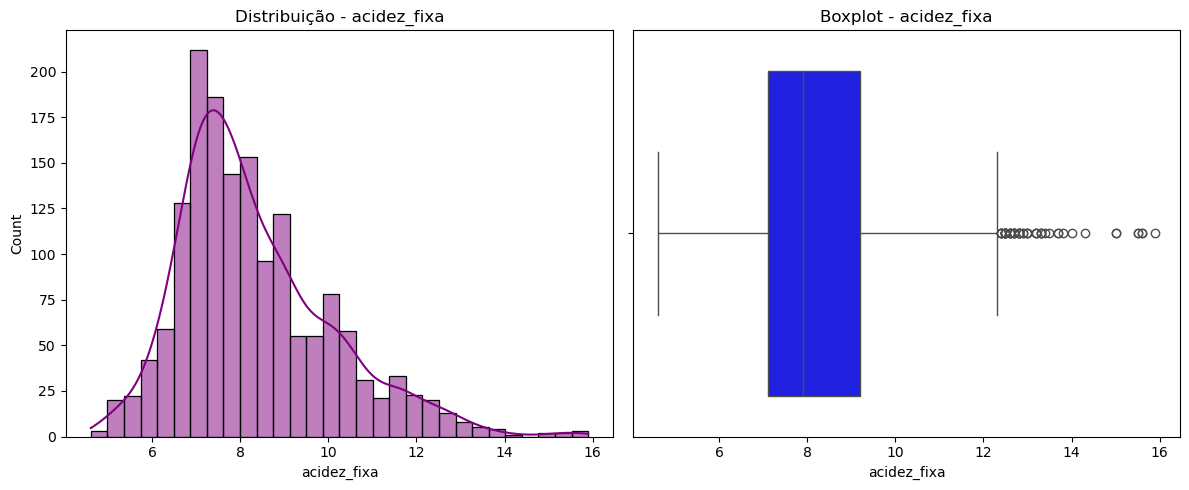


üìä An√°lise da coluna: acidez_volatil


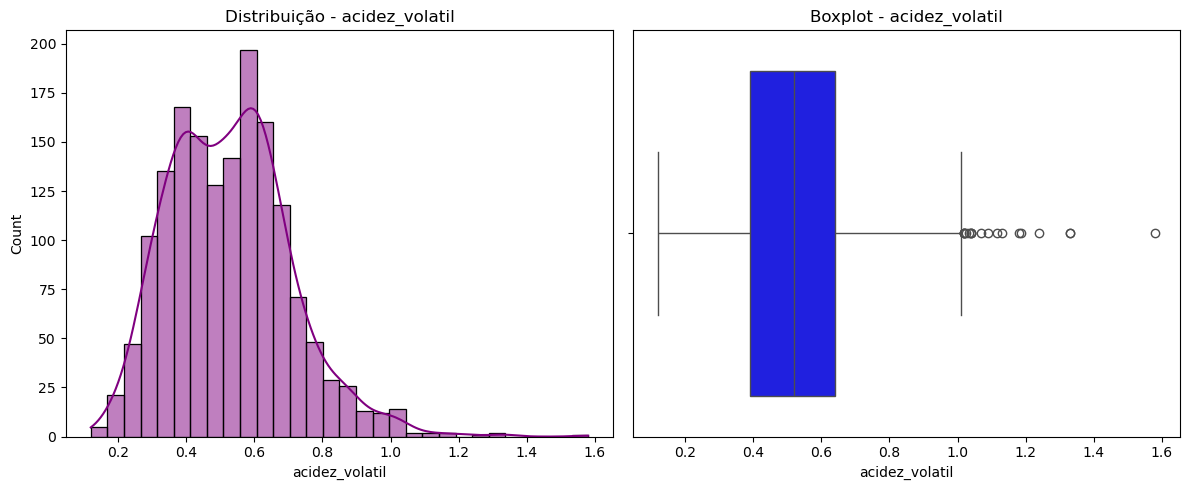


üìä An√°lise da coluna: acido_citrico


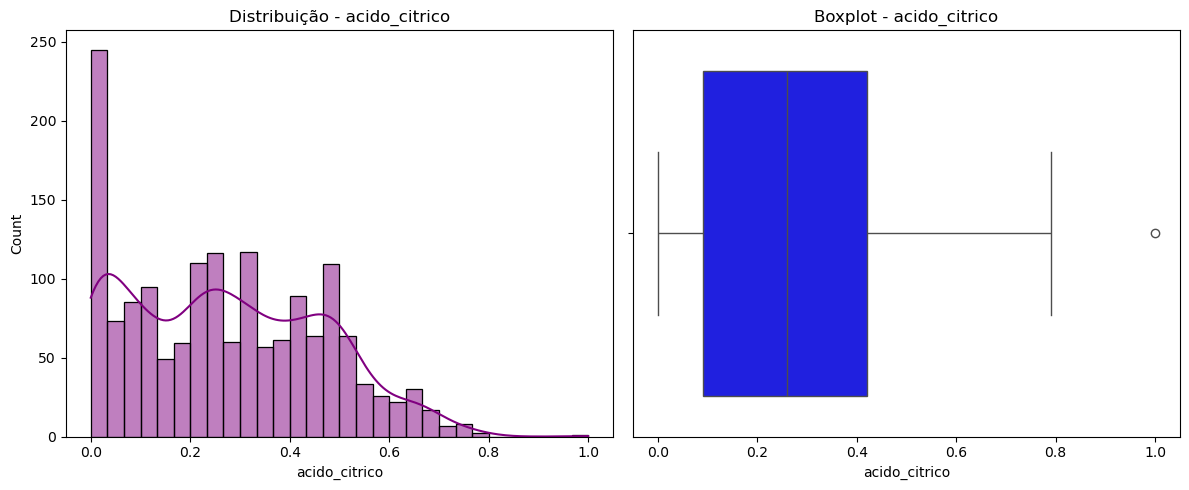


üìä An√°lise da coluna: acucar_residual


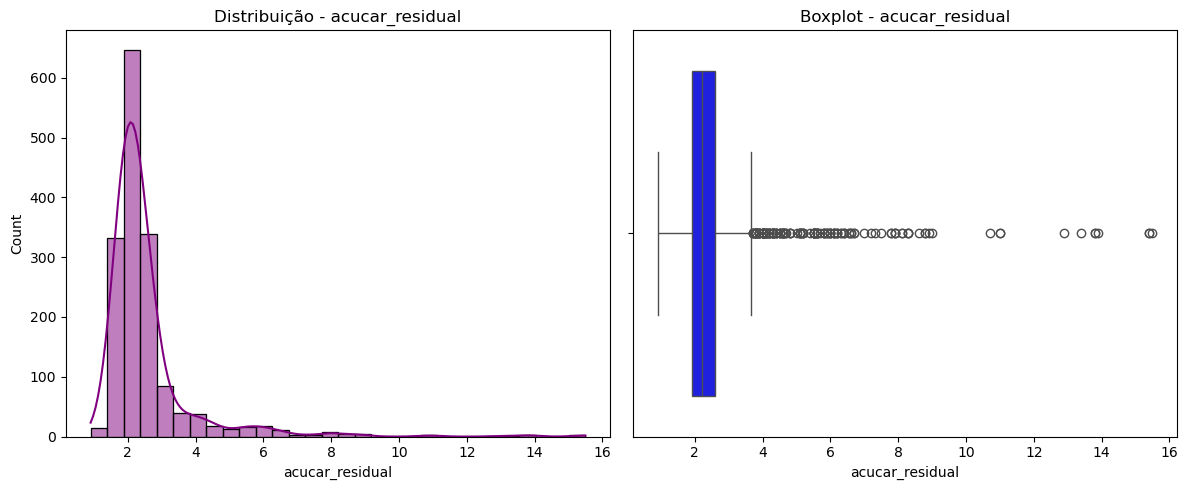


üìä An√°lise da coluna: cloretos


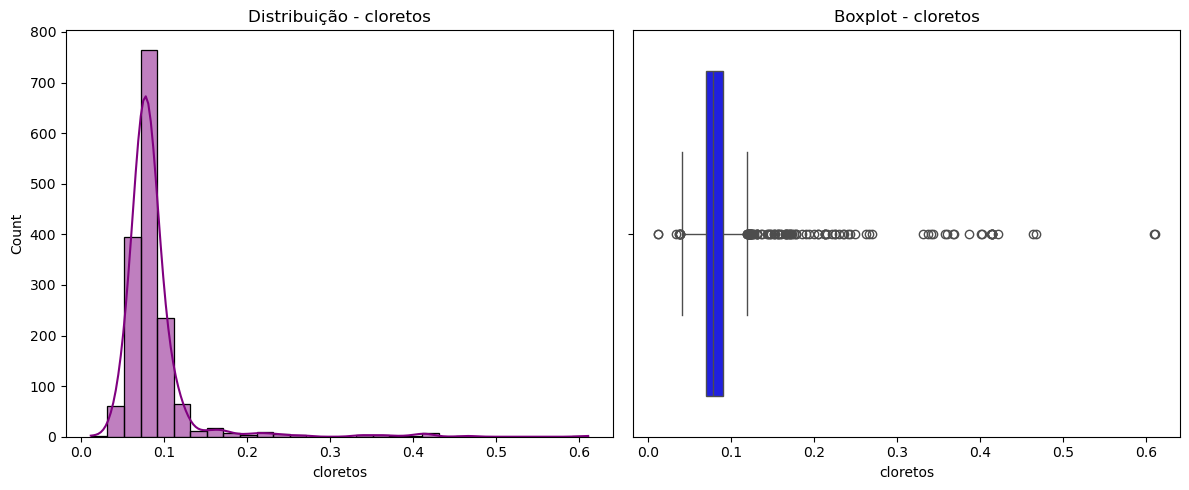


üìä An√°lise da coluna: dioxido_enxofre_livre


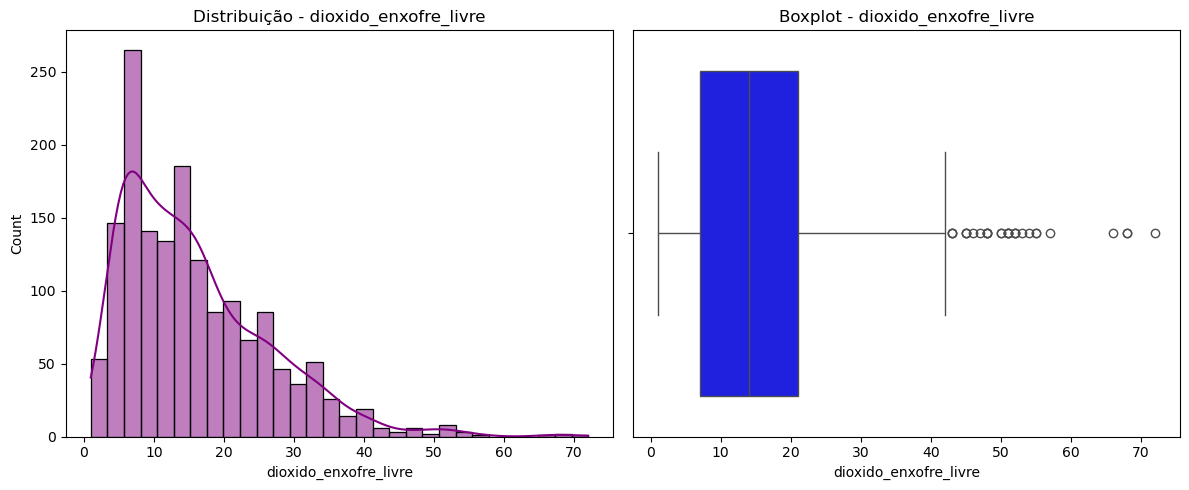


üìä An√°lise da coluna: dioxido_enxofre_total


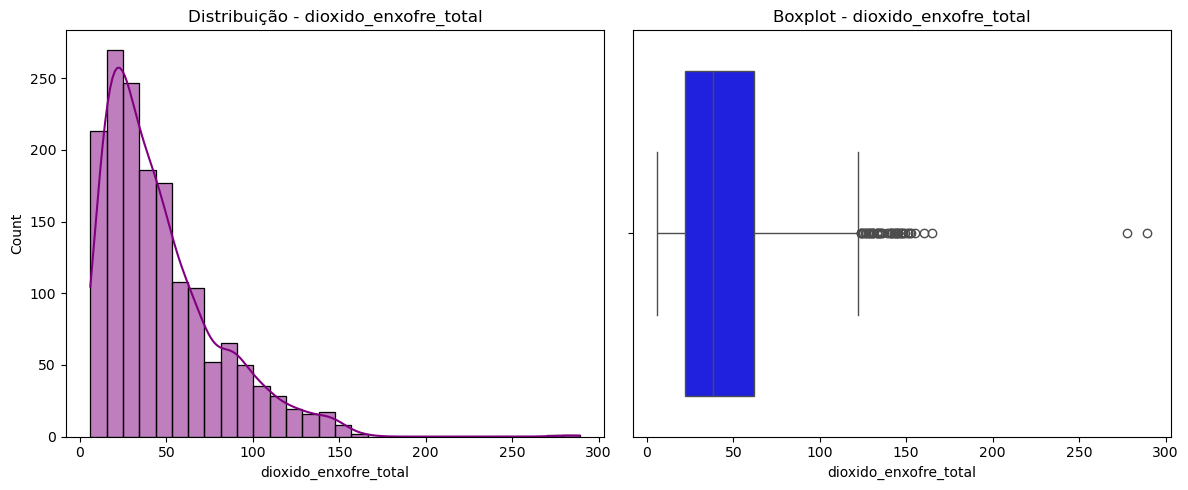


üìä An√°lise da coluna: densidade


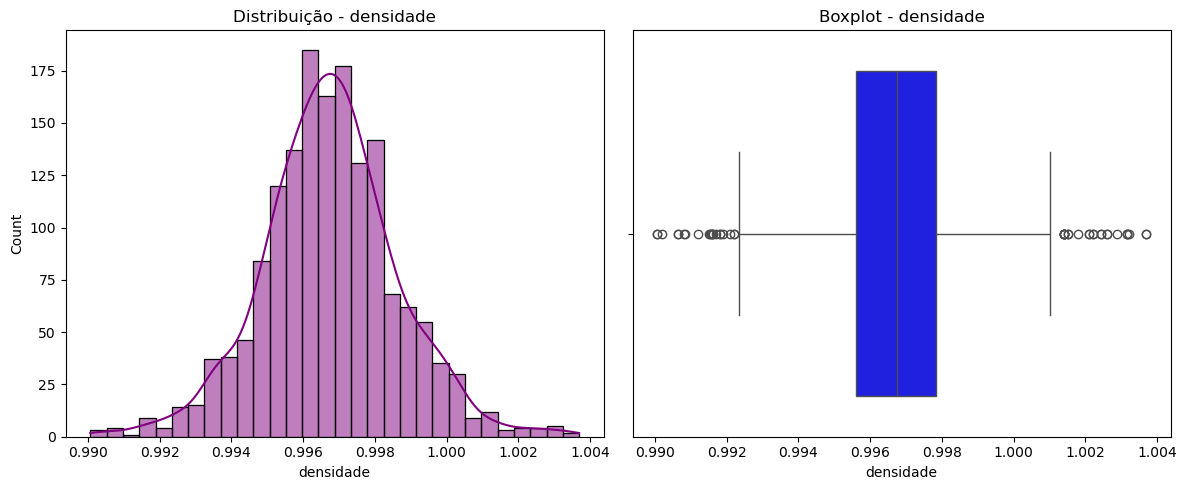


üìä An√°lise da coluna: ph


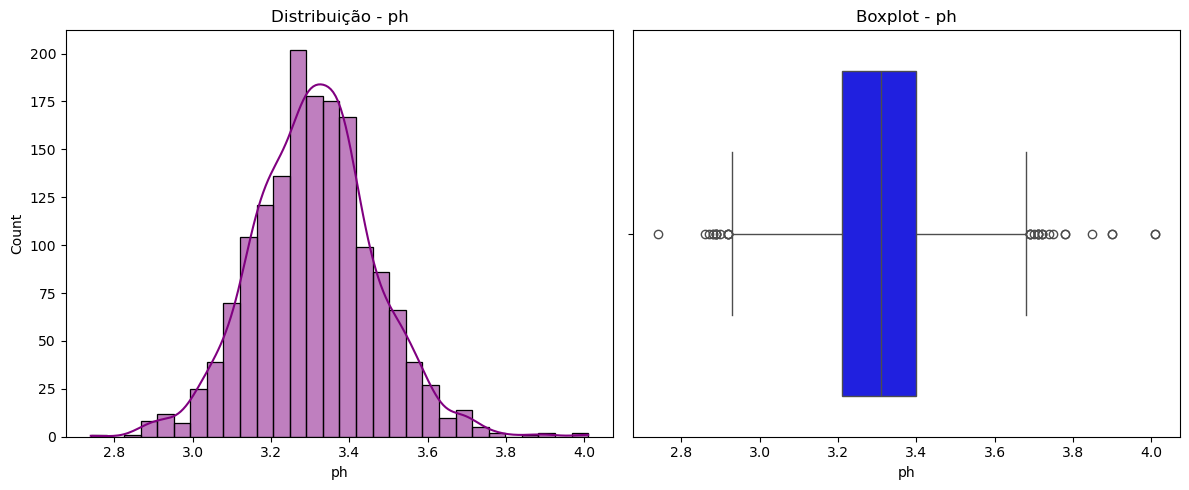


üìä An√°lise da coluna: sulfatos


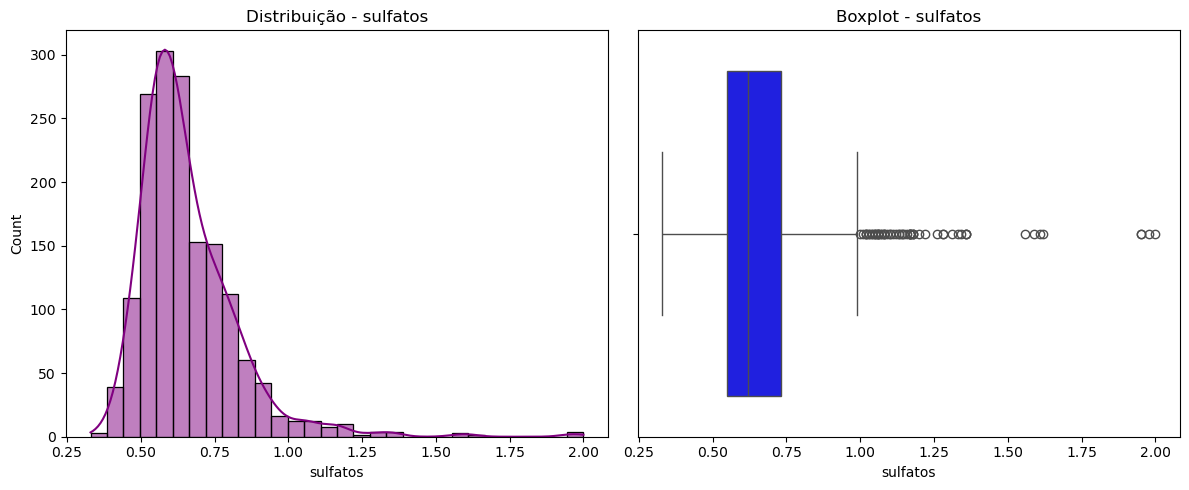


üìä An√°lise da coluna: alcool


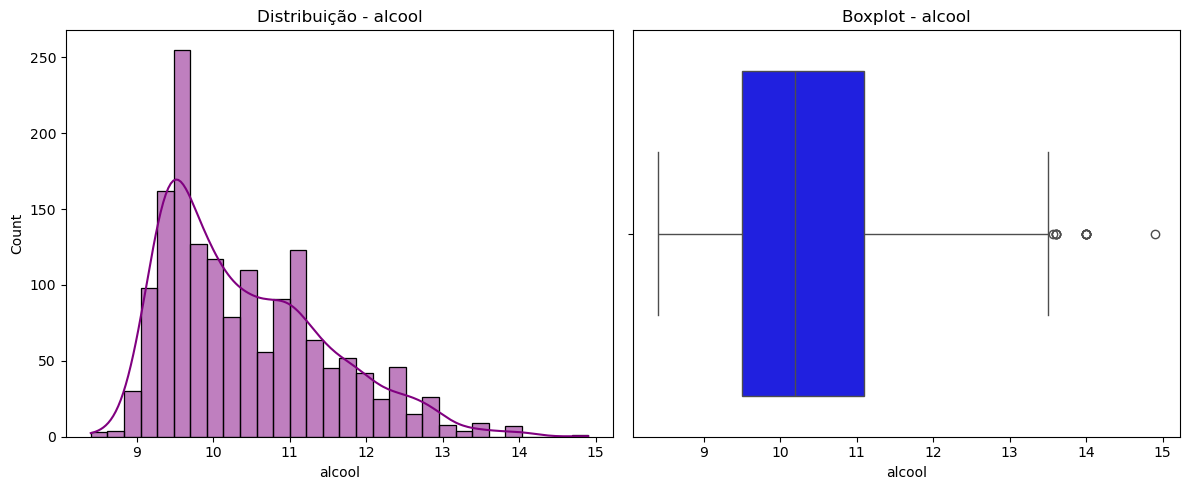


üìä An√°lise da coluna: qualidade


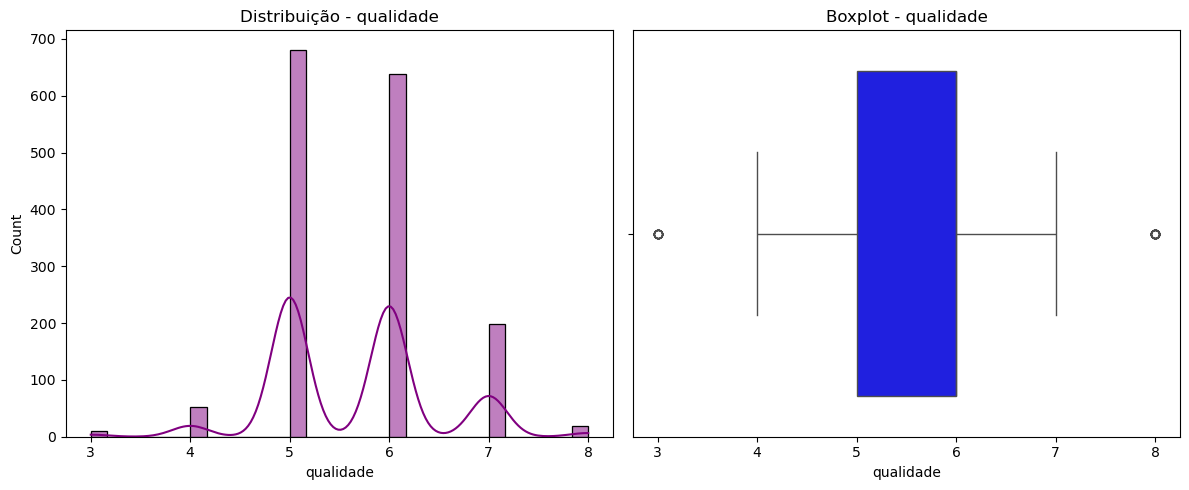

In [3]:
# Gr√°fico de distribui√ß√£o e boxplot
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfatos', 'alcool', 'qualidade']
grafo_dist_boxplot(df, colunas)

#### Detecta Outlier do DataSet

In [ ]:
detecta_outliers_iqr(df, colunas)


üìå Analisando a coluna: ACIDEZ_FIXA
üîπ Outliers (Z-Score): 12
     acidez_fixa  z_score_acidez_fixa
243         15.0             3.838072
244         15.0             3.838072
347         13.8             3.148635
374         14.0             3.263541
381         13.7             3.091182
üî∏ Outliers (IQR): 49
     acidez_fixa
205         12.8
206         12.8
243         15.0
244         15.0
264         12.5

üìå Analisando a coluna: ACIDEZ_VOLATIL
üîπ Outliers (Z-Score): 10
     acidez_volatil  z_score_acidez_volatil
38             1.13                3.364062
120            1.07                3.028873
126            1.33                4.481357
127            1.33                4.481357
199            1.09                3.140603
üî∏ Outliers (IQR): 19
     acidez_volatil
38             1.13
94             1.02
120            1.07
126            1.33
127            1.33

üìå Analisando a coluna: ACIDO_CITRICO
üîπ Outliers (Z-Score): 1
     acido_citrico  z_score_acido

In [11]:
# remove outliers
df_s_outliers = remove_outliers(df, colunas= colunas, metodo='zscore')

üîç Outliers removidos: 148 linhas


#### Ao gerar os gr√°ficos de distribui√ß√£o e boxplot, conseguimos observar, que n√£o ocorre uma distribui√ß√£o normal nos dados e tamb√©m temos outliers tanto observando o IQR quanto o zscore dentro de nosso dataset decidi por manter o outliers IQR e remover os outliers zscore que est√£o 3 vezes acima ou abaixo desvio padr√£o e s√≥ temos 148 linhas cerca de 0.9% um valor que podemos remover para deixar nosso dataset mais limpo para rodar os modelos de machine learning o restante irei aplicar padroniza√ß√£o para n√£o deixar os dados com uma diferen√ßa que possa prejudicar nossas previs√µes.

#### Confirma se ocorre distribui√ß√£o normal nas vari√°veis independentes (ph e densidade)

In [ ]:
# Observa distribui√ß√£o normal no ph
analisar_distribuicao(df, 'ph')

üìä An√°lise da coluna: **ph**

üìà Assimetria: 0.1935 (positiva)
üìâ Curtose: 0.8007 (leptoc√∫rtica)

üß™ Teste de Shapiro-Wilk:
   Estat√≠stica: 0.9922
   p-valor: 0.0105 ‚Üí ‚ùå N√£o normal

üß™ Teste de D‚ÄôAgostino-Pearson:
   Estat√≠stica: 33.6847
   p-valor: 0.0000 ‚Üí ‚ùå N√£o normal


In [4]:
# Observa distribui√ß√£o normal na densidade
analisar_distribuicao(df, 'densidade')

üìä An√°lise da coluna: **densidade**

üìà Assimetria: 0.0712 (positiva)
üìâ Curtose: 0.9274 (leptoc√∫rtica)

üß™ Teste de Shapiro-Wilk:
   Estat√≠stica: 0.9932
   p-valor: 0.0232 ‚Üí ‚ùå N√£o normal

üß™ Teste de D‚ÄôAgostino-Pearson:
   Estat√≠stica: 30.7077
   p-valor: 0.0000 ‚Üí ‚ùå N√£o normal


#### Observa correla√ß√£o entre as vari√°vies

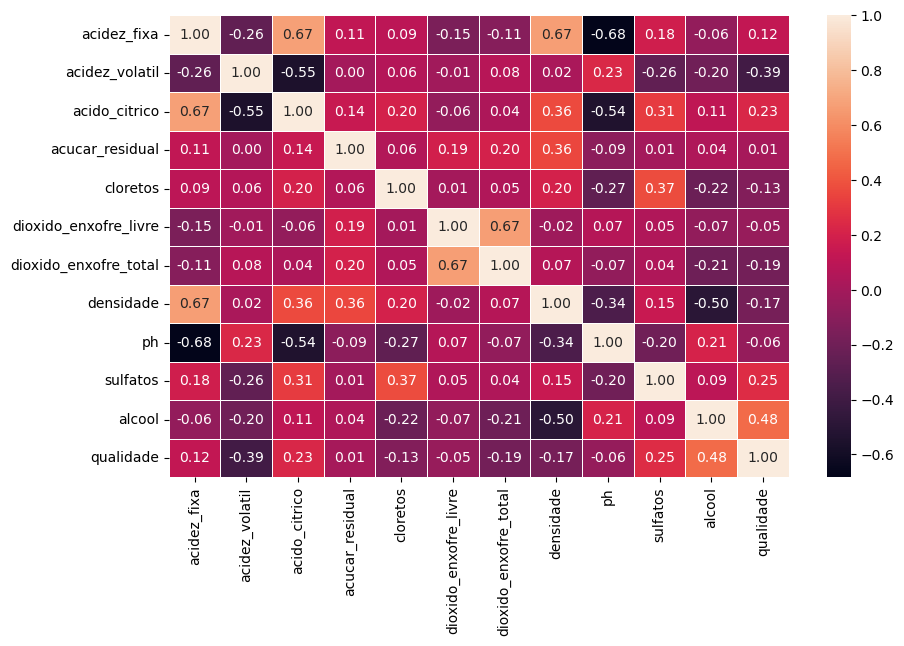

In [21]:
# Correla√ß√£o das vari√°veis
grafo_heatmap(df)

#### M√©dia de acidez vol√°til dos vinhos de qualidade elevada

In [4]:
df_filtrado = df[df['qualidade'] > 6]
df_filtrado

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
7             7.3            0.65           0.00              1.2     0.065   
8             7.8            0.58           0.02              2.0     0.073   
16            8.5            0.28           0.56              1.8     0.092   
37            8.1            0.38           0.28              2.1     0.066   
62            7.5            0.52           0.16              1.9     0.085   
...           ...             ...            ...              ...       ...   
1541          7.4            0.25           0.29              2.2     0.054   
1544          8.4            0.37           0.43              2.3     0.063   
1549          7.4            0.36           0.30              1.8     0.074   
1555          7.0            0.56           0.17              1.7     0.065   
1584          6.7            0.32           0.44              2.4     0.061   

      dioxido_enxofre_livre  dioxido_enxofre_total  densidade    ph  sulfatos  \
7                      15.0                   21.0    0.99460  3.39      0.47   
8                       9.0                   18.0    0.99680  3.36      0.57   
16                     35.0                  103.0    0.99690  3.30      0.75   
37                     13.0                   30.0    0.99680  3.23      0.73   
62                     12.0                   35.0    0.99680  3.38      0.62   
...                     ...                    ...        ...   ...       ...   
1541                   19.0                   49.0    0.99666  3.40      0.76   
1544                   12.0                   19.0    0.99550  3.17      0.81   
1549                   17.0                   24.0    0.99419  3.24      0.70   
1555                   15.0                   24.0    0.99514  3.44      0.68   
1584                   24.0                   34.0    0.99484  3.29      0.80   

      alcool  qualidade  
7      10.00          7  
8       9.50          7  
16     10.50          7  
37      9.70          7  
62      9.50          7  
...      ...        ...  
1541   10.90          7  
1544   11.20          7  
1549   11.40          8  
1555   10.55          7  
1584   11.60          7  

[217 rows x 12 columns]

In [15]:
# M√©dia de acidez vol√°til / qualidade
media_acidez_qualidade = pd.DataFrame(df_filtrado.groupby('qualidade')['acidez_volatil'].mean())
media_acidez_qualidade

acidez_volatil
qualidade                
7                0.403920
8                0.423333

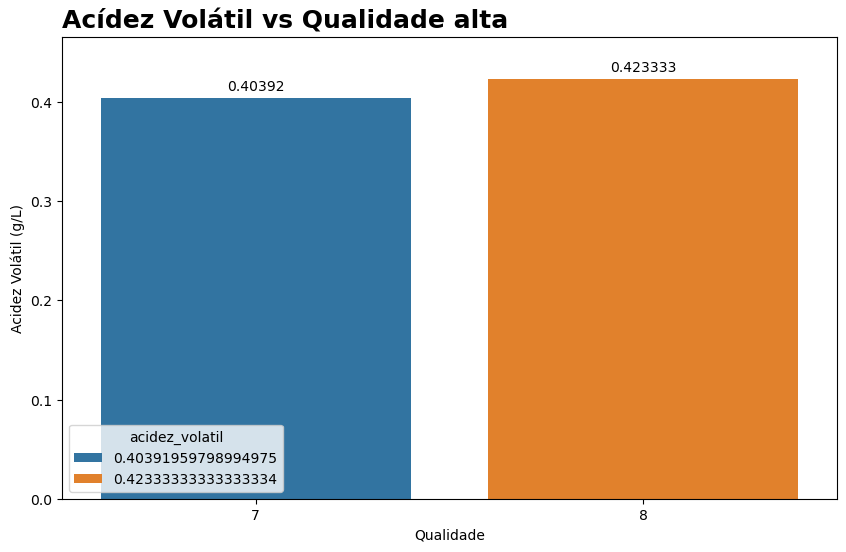

In [17]:
# Gr√°fico de barra Ac√≠dez Vol√°til / Qualidade do Vinho 0.39 de correla√ß√£o
grafo_barra(media_acidez_qualidade, media_acidez_qualidade.index, media_acidez_qualidade['acidez_volatil'], media_acidez_qualidade['acidez_volatil'], titulo='Ac√≠dez Vol√°til vs Qualidade alta', ylabel='Acidez Vol√°til (g/L)', xlabel='Qualidade')

#### A m√©dia entre acidez vol√°til vs qualidade est√£o pr√≥ximas nos vinhos de alta qualidade, nos mostrando que para alcan√ßar a qualidade necess√°ria o ideal √© fica entre essas m√©dias, mas n√£o descartando os outros componentes de prepara√ß√£o do vinho.

#### rela√ß√£o entre teor alc√≥olico e qualidade do vinho

In [18]:
# M√©dia de alcool / qualidade
media_alcool_qualidade = pd.DataFrame(df.groupby('qualidade')['alcool'].mean())
media_alcool_qualidade

alcool
qualidade           
3           9.955000
4          10.265094
5           9.899706
6          10.629519
7          11.465913
8          12.094444

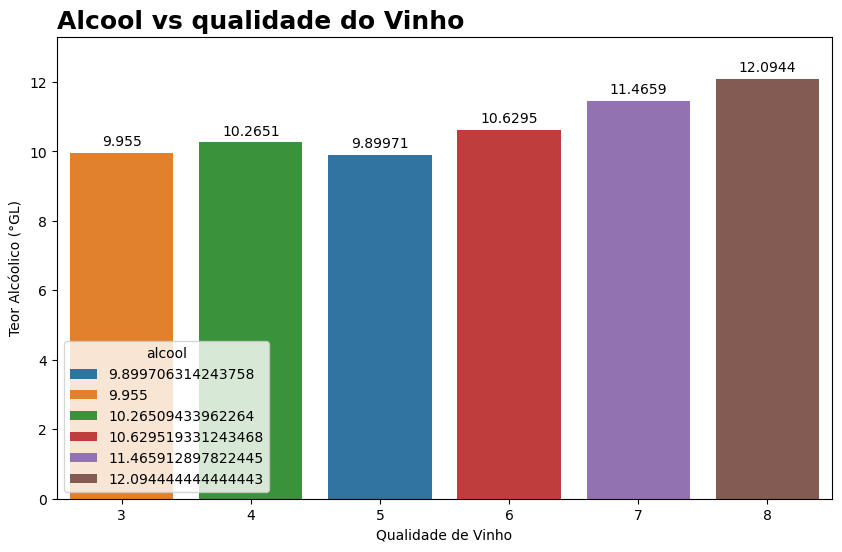

In [19]:
# Gr√°fico de barra alcool / Qualidade do Vinho 0.48 de correla√ß√£o
grafo_barra(media_alcool_qualidade, media_alcool_qualidade.index, media_alcool_qualidade['alcool'], media_alcool_qualidade['alcool'],titulo='Alcool vs qualidade do Vinho', ylabel='Teor Alc√≥olico (¬∞GL)', xlabel='Qualidade de Vinho')

#### A rela√ß√£o entre o teor alc√≥olico vs qualidade do vinho conforme o gr√°fico indica s√£o diretamente proporcional, sendo que quanto maior o teor alc√≥olico maior a qualidade, mas observando que conforme a wikipedia relata, o teor alc√≥olico n√£o pode indicar a qualidade do vinho, e que o seu ideal √© ficar abaixo de 13% para o vinho se manter equilibrio no paladar e tender a ter corpo mais leve e mais refrescante na boca e a legisla√ß√£o brasileira considera que para ser considerado vinho, tem que ficar acima de 7%.

#### rela√ß√£o entre sulfatos e qualidade do vinho

In [8]:
# M√©dia de sulfato / qualidade
media_sulfato_qualidade = pd.DataFrame(df.groupby('qualidade')['sulfatos'].mean())
media_sulfato_qualidade

sulfatos
qualidade          
3          0.570000
4          0.596415
5          0.620969
6          0.675329
7          0.741256
8          0.767778

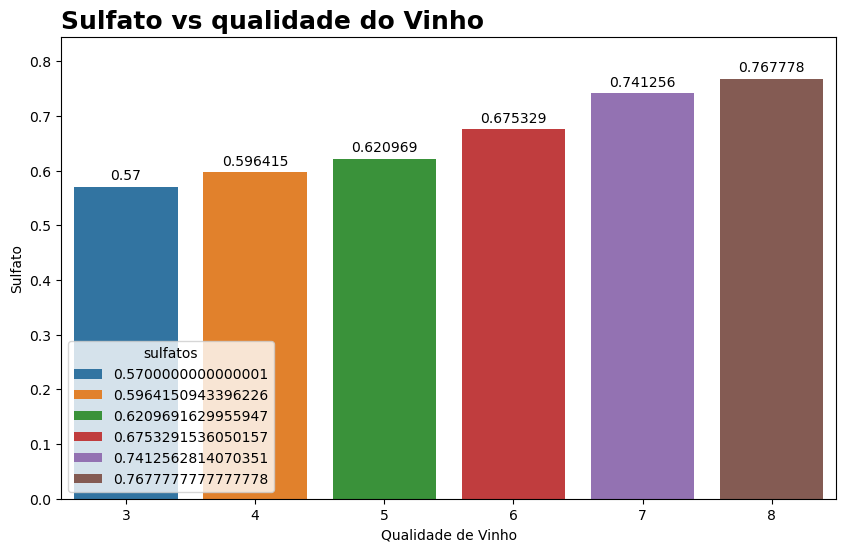

In [9]:
# Gr√°fico de barra Sulfato / Qualidade do Vinho 0.25 de correla√ß√£o
grafo_barra(media_sulfato_qualidade, media_sulfato_qualidade.index, media_sulfato_qualidade['sulfatos'], media_sulfato_qualidade['sulfatos'],titulo='Sulfato vs qualidade do Vinho', ylabel='Sulfato', xlabel='Qualidade de Vinho')

#### rela√ß√£o entre √°cido c√≠trico e qualidade do vinho

In [10]:
# M√©dia de √Åcido C√≠trico / qualidade
media_citrico_qualidade = pd.DataFrame(df.groupby('qualidade')['acido_citrico'].mean())
media_citrico_qualidade

acido_citrico
qualidade               
3               0.171000
4               0.174151
5               0.243686
6               0.273824
7               0.375176
8               0.391111

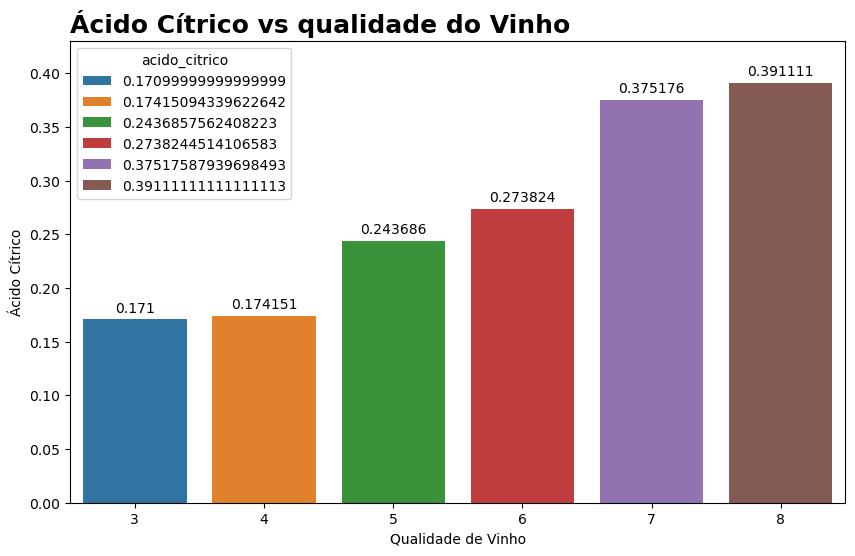

In [11]:
# Gr√°fico de barra Sulfato / Qualidade do Vinho 0.25 de correla√ß√£o
grafo_barra(media_citrico_qualidade, media_citrico_qualidade.index, media_citrico_qualidade['acido_citrico'], media_citrico_qualidade['acido_citrico'],titulo='√Åcido C√≠trico vs qualidade do Vinho', ylabel='√Åcido C√≠trico', xlabel='Qualidade de Vinho')

#### Como os gr√°fico das m√©dias do seulfatos e √°cido c√≠trico vs qualidade nos mostra que tamb√©m s√£o diretamente proporcionais a qualidade do vinho.
#### Vamos observar a rela√ß√µes entres algumas v√°ri√°veis para que possamos dar continuidade e escolhermos qual tipo de modelo nos ajudar√°, nas previs√µes de qualidades para nossos futuros vinhos.

#### Rela√ß√£o entre acidez vol√°til e teor alc√≥olico

# **Classifica√ß√£o Geral de Correla√ß√£o de Pearson:**  
**Valor da Correla√ß√£o(r)**----**Intensidade**-----------**Dire√ß√£o**  
-0,70 a -1,00--------------------Forte----------------Negativa    
-0,39 a -0,69---------------Moderada a fraca----------Negativa    
-0,20 a -0,38--------------------Fraca----------------Negativa    
-0,19 a +0,19---------------Praticamente nula----------Neutra    

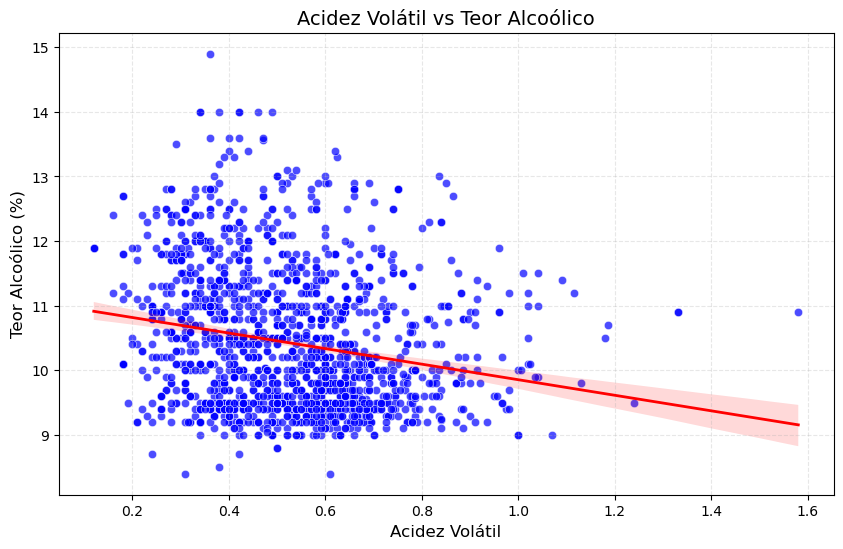

In [ ]:
# Rela√ß√£o entre acidez vol√°til e teor alc√≥olico
grafo_scatterplot(df, df['acidez_volatil'], df['alcool'], titulo='Acidez Vol√°til vs Teor Alco√≥lico', xlabel='Acidez Vol√°til', ylabel='Teor Alco√≥lico (%)')

In [ ]:
# Teste correla√ß√£o de Pearson
corr_alcool_acidez_volatil = df[['alcool', 'acidez_volatil']].corr('pearson', numeric_only=True)
corr_alcool_acidez_volatil

alcool  acidez_volatil
alcool          1.000000       -0.202288
acidez_volatil -0.202288        1.000000

#### Rela√ß√£o entre acidez vol√°til e qualidade do vinho

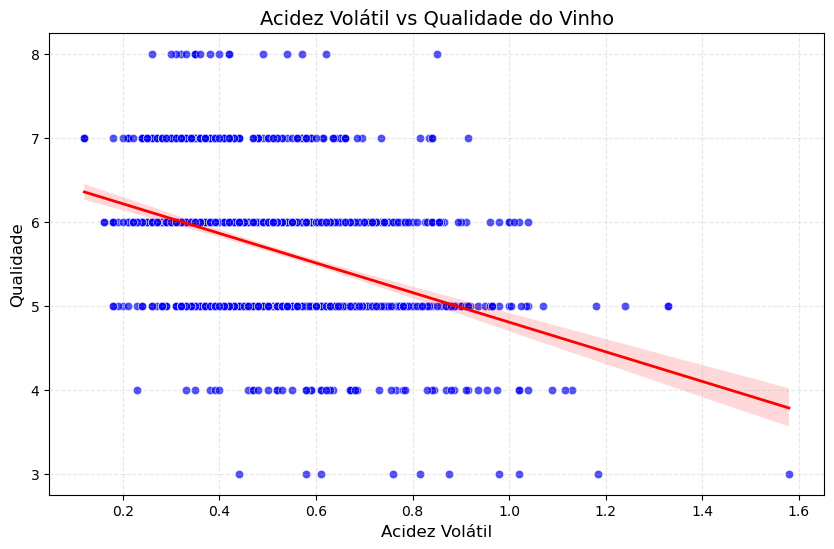

In [4]:
# Rela√ß√£o entre acidez vol√°til e teor qualidade do vinho
grafo_scatterplot(df, df['acidez_volatil'], df['qualidade'], titulo='Acidez Vol√°til vs Qualidade do Vinho', xlabel='Acidez Vol√°til', ylabel='Qualidade')

In [29]:
# Teste correla√ß√£o de Pearson
corr_acidez_volatil_qualidade = df[['acidez_volatil', 'qualidade']].corr('pearson', numeric_only=True)
corr_acidez_volatil_qualidade

acidez_volatil  qualidade
acidez_volatil        1.000000  -0.390558
qualidade            -0.390558   1.000000

#### Rela√ß√£o entre alcool e qualidade do vinho

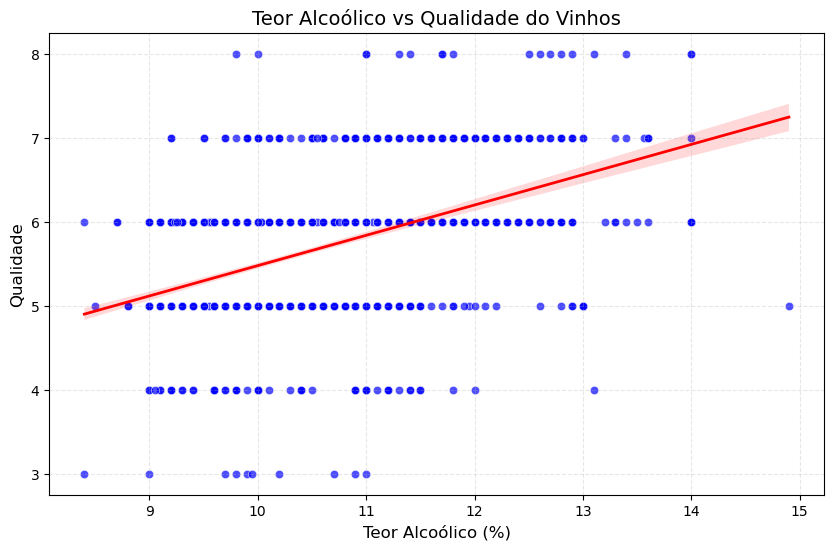

In [ ]:
# Rela√ß√£o entre teor alc√≥olico vs qualidade do vinho
grafo_scatterplot(df, df['alcool'], df['qualidade'], titulo='Teor Alco√≥lico vs Qualidade do Vinho', xlabel='Teor Alco√≥lico (%)', ylabel='Qualidade')

In [30]:
# Teste correla√ß√£o de Pearson
corr_alcool_acidez_qualidade = df[['alcool', 'qualidade']].corr('pearson', numeric_only=True)
corr_alcool_acidez_qualidade

alcool  qualidade
alcool     1.000000   0.476166
qualidade  0.476166   1.000000

#### Rela√ß√£o entre sulfatos e qualidade do vinho

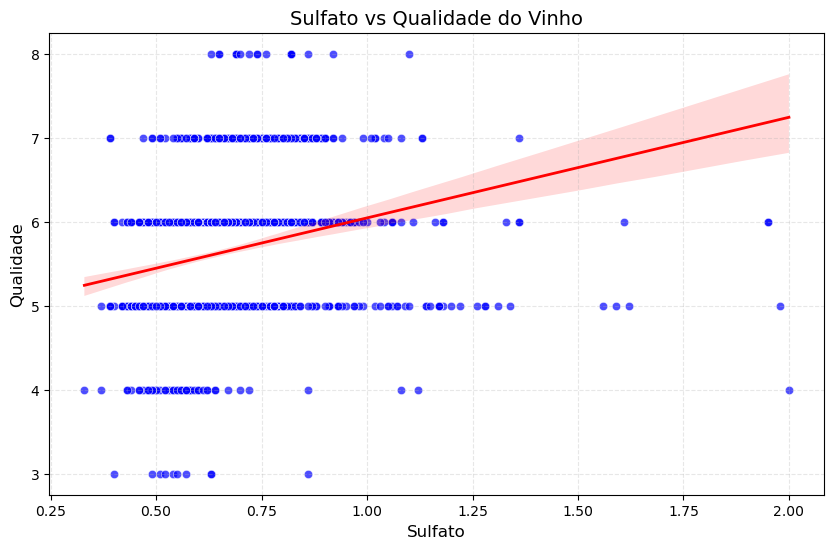

In [ ]:
# Rela√ß√£o entre sulfato vs qualidade do vinho
grafo_scatterplot(df, df['sulfatos'], df['qualidade'], titulo='Sulfato vs Qualidade do Vinho', xlabel='Sulfato', ylabel='Qualidade')

In [31]:
# Teste correla√ß√£o de Pearson
corr_sulfatos_qualidade = df[['sulfatos', 'qualidade']].corr('pearson', numeric_only=True)
corr_sulfatos_qualidade

sulfatos  qualidade
sulfatos   1.000000   0.251397
qualidade  0.251397   1.000000

#### Rela√ß√£o entre √°cido c√≠trico e qualidade do vinho

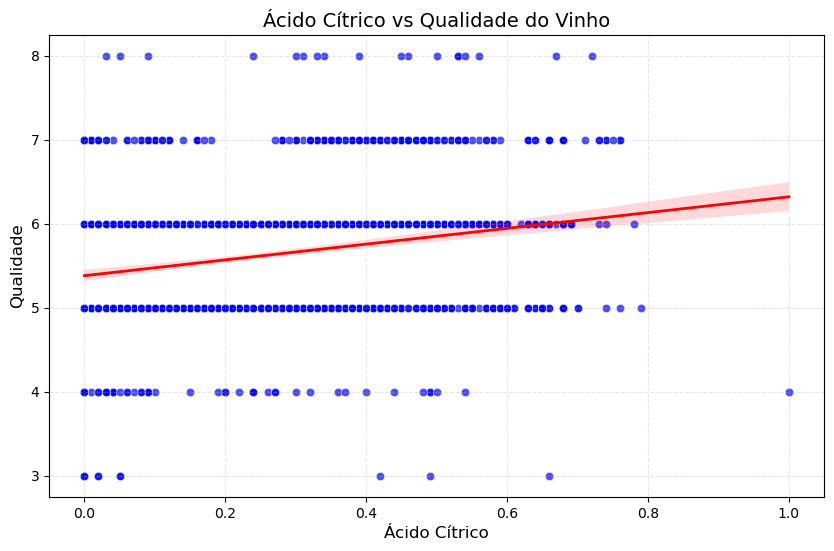

In [21]:
# Rela√ß√£o entre √°cido c√≠trico vs qualidade do vinho
grafo_scatterplot(df, df['acido_citrico'], df['qualidade'], titulo='√Åcido C√≠trico vs Qualidade do Vinho', xlabel='√Åcido C√≠trico', ylabel='Qualidade')

In [32]:
# Teste correla√ß√£o de Pearson
corr_acido_citrico_qualidade = df[['acido_citrico', 'qualidade']].corr('pearson', numeric_only=True)
corr_acido_citrico_qualidade

acido_citrico  qualidade
acido_citrico       1.000000   0.226373
qualidade           0.226373   1.000000

#### A correla√ß√£o mais alta que encontramos entre as vari√°veis independentes com a vari√°vel resposta, no caso que utilizarei como resposta √© a varai√°vel alcool com 0.49 positiva de correla√ß√£o pearson entrando na intensidad Moderada a fraca como deixei na tabela acima 

Conclus√£o:

A correla√ß√£o n√£o implica que **mais √°lcool** = **melhor qualidade**, apenas que h√° uma tend√™ncia nos dados analisados.

- Embora exista uma rela√ß√£o moderada (r = 0,48) entre teor alco√≥lico e qualidade, isso n√£o significa que aumentar o √°lcool melhora o vinho automaticamente. 

- Recomenda-se analisar outras vari√°veis (como tipo de uva, regi√£o clim√°tica ou t√©cnicas de vinifica√ß√£o) para entender completamente os drivers de qualidade.

- Iniciarei a cria√ß√£o dos algortimos com as **co-vari√°veis** originais do dataset e caso n√£o consiga alcan√ßar predi√ß√µes com valores satisfat√≥rios de retorno para alcan√ßarmos a qualidade necess√°ria para cria√ß√£o de vinho. Ent√£o irei buscar **co-vari√°veis** externas para alcan√ßar os objetivos.

In [4]:
def teste(nome, idade, cidade):
    print(f'{nome} tem {idade} anos e mora em {cidade}')

dados = {'nome': 'Jackson', 'idade': 41, 'cidade':'Guarulhos'}

teste(**dados)

Jackson tem 41 anos e mora em Guarulhos
